#### Pandas Data Manipulation Lab¶
This lab is intentionally open-ended, and you're encouraged to answer your own inquisitivities about the dataset.

##### Lab Summary
On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?
You must provide, at least, a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?

##### Minimum Requirements
At a minimum, you must:
- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

##### At a maximum, you should strive:
- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualization* (tomorrow will help)

# Time it takes a song to get to the top.
pd.to_datetime
# Converting song time to an actual time (from a string)

# Weekly Average Rating

# How many weeks a song was number 1 

# Get the correct genre for each artist

# Word that appears most often in song Names

# Entry level rating of Genre

# Time to peak grouped by Genre

# Visualize the lifecycle of a song (average)

##### Use Pandas to read in your data

In [4]:
import numpy as np
import pandas as pd

music = pd.read_csv('../../datasets/billboard.csv', encoding='latin-1')

In [5]:
print(len(music))
# This Dataset has 317 values

317


In [6]:
# You can run this cell if you don't believe me
music.isnull().sum()

year                 0
artist.inverted      0
track                0
time                 0
genre                0
date.entered         0
date.peaked          0
x1st.week            0
x2nd.week            5
x3rd.week           10
x4th.week           17
x5th.week           25
x6th.week           37
x7th.week           48
x8th.week           57
x9th.week           64
x10th.week          73
x11th.week          81
x12th.week          95
x13th.week         107
x14th.week         113
x15th.week         120
x16th.week         135
x17th.week         140
x18th.week         151
x19th.week         161
x20th.week         171
x21st.week         252
x22nd.week         262
x23rd.week         269
                  ... 
x47th.week         312
x48th.week         313
x49th.week         313
x50th.week         313
x51st.week         313
x52nd.week         313
x53rd.week         313
x54th.week         315
x55th.week         315
x56th.week         315
x57th.week         315
x58th.week         315
x59th.week 

Given that there are 317 observations in this dataset and for weeks 66-76 there are 317 nulls, It is safe to assume that those weeks can be dropped because they contain no relevant information.  

##### Rename column names where appropriate

In [7]:
# creating a list of week names that arn't crap
week = 1
week_list = []
while week < 77:
    week_num = 'week '+ str(week)
    week_list.append(week_num)
    week += 1

Week_list is a list that states weeks as 'week x' to be appeneded to the silly way the variables are currently displayed.

Other than the weeks, the other features are ... 
['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked']

Im going to change them to...
['year','artist','track', 'length','genre','first_apperence','peak_date']

In [8]:
names = ['year','artist','track', 'length','genre','first_apperence','highest_data']

for item in week_list:
    names.append(item)

music.columns = names
music.head()

,year,artist,track,length,genre,first_apperence,highest_data,week 1,week 2,week 3,...,week 67,week 68,week 69,week 70,week 71,week 72,week 73,week 74,week 75,week 76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# dropping all those columns with zero values in them.
music.drop(['week 66','week 67','week 68','week 69','week 70','week 71',
           'week 72','week 73','week 74','week 74','week 75','week 76'],
           axis =1,inplace = True)

In [10]:
# getting only the columns that correspond to weekly ratings
music[music.columns[7:72]].count(axis=1)

# Creates a dataframe column called 'weeks_active' that is the number of weeks the song is on the top 100
music['weeks_active'] = music[music.columns[7:72]].count(axis=1)

In [12]:
df = music[music.columns[7:72]].copy()
df.head()

,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,week 9,week 10,...,week 56,week 57,week 58,week 59,week 60,week 61,week 62,week 63,week 64,week 65
0,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
############# This little program finds the number of weeks a song has been #1 in Billboard charts #####
for row in range(len(df)):
    try:
        df.loc[row, 'number_1_weeks'] = pd.value_counts(df.ix[row].values)[1]
    except:
        df.loc[row, 'number_1_weeks'] = 0

df.head()

,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,week 9,week 10,...,week 57,week 58,week 59,week 60,week 61,week 62,week 63,week 64,week 65,number_1_weeks
0,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [17]:
d=[78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,2.0,1.0] 
e=[15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0]
f=[115,28.0,16.0,12.0,8.0,5.0,2.0,2.0,1.0,1.0]

dft = pd.DataFrame({'a':d,'b':e,'c':f})

for row in range(len(dft)):
    try:
        dft.loc[row, 'new_col'] = pd.value_counts(dft.iloc[row].values)[1]
    except:
        dft.loc[row, 'new_col'] =  0
dft

,a,b,c,new_col
0,78.0,15.0,115.0,0.0
1,63.0,8.0,28.0,0.0
2,49.0,6.0,16.0,0.0
3,33.0,5.0,12.0,0.0
4,23.0,2.0,8.0,0.0
5,15.0,3.0,5.0,0.0
6,7.0,2.0,2.0,0.0
7,5.0,2.0,2.0,0.0
8,2.0,1.0,1.0,2.0
9,1.0,1.0,1.0,3.0


In [21]:
df['number_1_weeks'].head(2)

0    11.0
1    10.0
Name: number_1_weeks, dtype: float64

In [22]:
music['number_1_weeks'] = df['number_1_weeks']
music.head(2)

,year,artist,track,length,genre,first_apperence,highest_data,week 1,week 2,week 3,...,week 58,week 59,week 60,week 61,week 62,week 63,week 64,week 65,weeks_active,number_1_weeks
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,11.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,10.0


In [23]:
music1 = music[:]
subset = ['year',
 'artist',
 'track',
 'length',
 'genre',
 'first_apperence',
 'highest_data',
 'weeks_active',
 'number_1_weeks']

In [25]:
music1 = music[subset]
music1

,year,artist,track,length,genre,first_apperence,highest_data,weeks_active,number_1_weeks
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,28,11.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,26,10.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,33,4.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,24,4.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,21,4.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,24,3.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,32,3.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,20,3.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,26,2.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,55,2.0


In [ ]:
music1.to_csv('billboard_ram1.csv',index=False)

##### Describe your data: check the value counts and descriptive statistics

In [26]:
music.head()

#not exactly the most useful

,year,artist,track,length,genre,first_apperence,highest_data,week 1,week 2,week 3,...,week 58,week 59,week 60,week 61,week 62,week 63,week 64,week 65,weeks_active,number_1_weeks
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,11.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,10.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,4.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,4.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,4.0


In [27]:
# I wonder What musicians were on the board the most in 2000?
music['artist'].value_counts().head(10)

Jay-Z                5
Dixie Chicks, The    4
Houston, Whitney     4
Rimes, LeAnn         3
Eminem               3
Destiny's Child      3
Lonestar             3
SheDaisy             3
Braxton, Toni        3
Thomas, Carl         3
Name: artist, dtype: int64

In [28]:
# Wow, sure looks like Country and HipHop dominate the chart.  Lets see what distribution of songs that make it to
# the top 100 are
music['genre'].value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Latin            9
Pop              9
Electronica      4
Jazz             1
Gospel           1
Reggae           1
Name: genre, dtype: int64

In [29]:
# Getting a dataframe that will only be used for a plot
plot_frame = music[['genre','weeks_active']]

Going to try to plot average length on top 100 by genre.


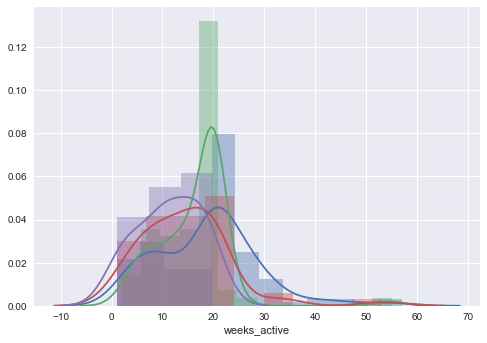

In [30]:
# Stacking distribution of of songs lifes grouped by genre(color) 
import matplotlib.pyplot as plt
import seaborn as sns

genres = ['Rock','Country','Rap','R&B']

for m_type in genres:
    sub_df = plot_frame[plot_frame['genre']== m_type]
    sns.distplot(sub_df['weeks_active']);

plt.show();

- Green = Country
- Blue = Rock
- Red = Rap
- Purple = R&B



##### Addressing* Validity of data

In [31]:
# Making a DF copy where all the Nulls are filled with 0's

music2 = music.fillna(value = 0)

In [32]:
# Engineered column displaying a songs average weekly rating.

music['avg_weekly_rating'] = music2[music2.columns[7:73]].sum(axis =1)/music2['weeks_active']

In [33]:
music.head()

,year,artist,track,length,genre,first_apperence,highest_data,week 1,week 2,week 3,...,week 59,week 60,week 61,week 62,week 63,week 64,week 65,weeks_active,number_1_weeks,avg_weekly_rating
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,11.0,15.821429
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,10.0,11.500000
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,4.0,18.363636
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,4.0,14.458333
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,4.0,20.952381


In [34]:
# Let's check out the average_weekly rating grouped by Genre

music.groupby(['genre'])['avg_weekly_rating'].mean()

genre
Country        67.690659
Electronica    66.170833
Gospel         68.750000
Jazz           52.800000
Latin          53.133637
Pop            65.055007
R&B            75.677187
Rap            68.915707
Reggae         73.400000
Rock           53.941287
Name: avg_weekly_rating, dtype: float64

In [35]:
music['median_weekly_rating'] = music[music.columns[7:73]].median(axis=1)

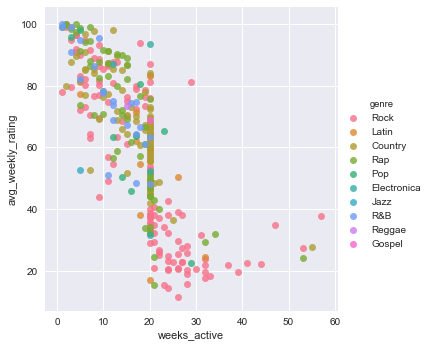

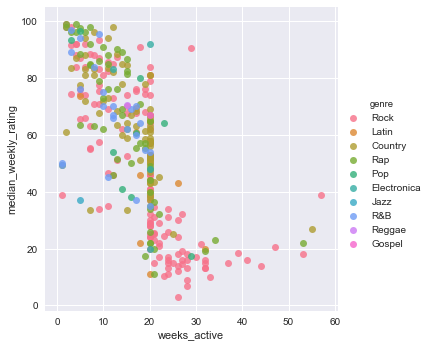

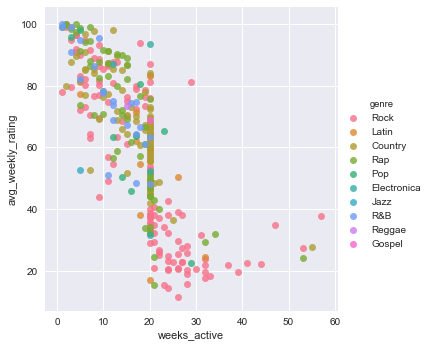

In [38]:
# Plot the weekly mean rating by weeks active.  Color is genre
sns.lmplot(x = 'weeks_active',y ='avg_weekly_rating', hue = 'genre', data = music, fit_reg=False);

plt.show()

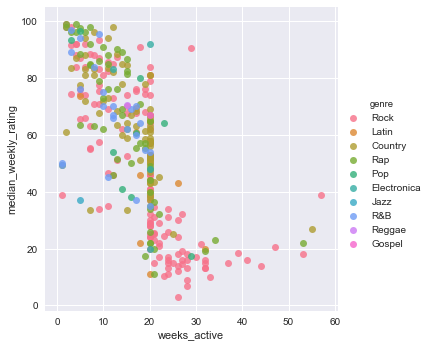

In [39]:
# Plot the median rating as well so we can see if the datas medians and means are vastly different.
sns.lmplot(x='weeks_active', y='median_weekly_rating', hue = 'genre', data = music, fit_reg=False);

plt.show()

##### Stakeholder Insights
As clear from the visualizations, 20 weeks active seems to be where alot of songs hover.  A goal by a record label to have a song stay in the top 100 for more than 20 weeks would be beneficial as songs that maintain activity longer than 20 weeks on average recieve better ratings.  

##### Yearly Insights
Rock dominates those songs that maintain long lifes on the top 100 and coincidentally are also those with the best weekly ratings.

##### idk
While Rock music seems to have the most songs appear within the top 100, longest lifestyle and average weekly rating, no rock group appears in the top 10 most frequent artists.

##### Data Limitations
It would be nice to have additional years of information.

going to want a DF for this where

DF is called the song name
Column 1 = Week Number
Column 2 = Chart Rating

Calling the function below will return a chart of any songs life trend.  This is case sensitive so make sure your song is typed exactly as it appears in the dataframe.

There is an example below

In [45]:
def song_life(title):
    plt.style.use('seaborn')
    
    # Grab the column to plot 
    samp = music[music['track'] == title][music[music['track'] == title].columns[7:72]]
    
    # Drop null values
    samp.dropna(axis=1, inplace = True)
    
    # Transpose the matrix
    samp_t = samp.transpose()
    
    # Reset index twice to get a column where week is listed as an int value for plotting
    samp_t.reset_index(inplace = True)
    samp_t.reset_index(inplace = True)
    
    # Rename the columns
    samp_t.columns = ['Week','numbered_week','Rating']
    
    # Plot it!
    plt.plot((samp_t['Week']+1),samp_t['Rating'])
    plt.xlabel('Weeks in Top 100')
    plt.ylabel('Weekly Rating')
    plt.gca().invert_yaxis()
    
    plt.show()

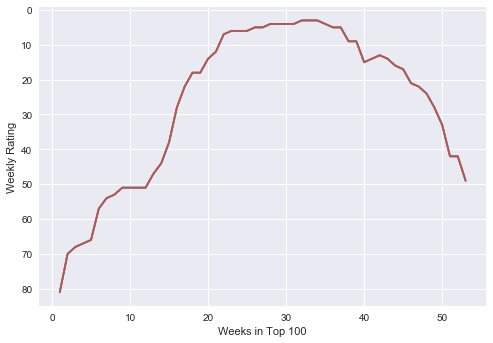

In [46]:
song_life('Kryptonite')